## AdaBoost

AdaBoost, or adaptive boosting is an ensemble learning method that uses iteration to learn from the errors of weak classifiers to develop strong classifiers. It is based on the concept that a single weak classifier may not be able to accurately predict the class of an object (slightly better than a guess), but when multiple weak classifiers are combined, a strong classifier can be created. 
* AdaBoost is not a model, it is applied on top other types of classifiers, e.g. logistic regression or decision trees, to learn from their limitations and suggest an improved model. 
* AdaBoost is sequential. Firstly, a model is built based on training data. This model is evaluated, then another model is trained to specifically correct the errors of the first model by increasing the weights of the misclassifed examples and decreasing the weights of the correctly classified examples. 
* This process is repeated iteratively until the model cannot be improved or a predefined limit of iterations is reached.
* Error is reduced very rapidly, meaning AdaBoost has a high convergence rate
* Predictions are made by calculating the weighted majority vote or weighted average of the weak classifiers

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [35]:
data = pd.read_csv("./datasets/heart_failure_clinical_records_dataset.csv")

In [36]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [56]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [79]:
data.features = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
data.target = data.DEATH_EVENT

In [80]:
x_train, x_test, y_train, y_test = train_test_split(data.features,data.target, test_size=0.2)

In [81]:
classifier = AdaBoostClassifier(n_estimators=100, learning_rate=0.1)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)
print(confusion_matrix(y_test, predictions))
print("Accuracy: {:0.2f}%".format(accuracy_score(y_test, predictions)*100))

[[36  8]
 [ 7  9]]
Accuracy: 75.00%


### Improving the Model via Grid Search
This method chooses the best parameters for training, but takes a bit longer!

In [83]:
param_dist = {'n_estimators': [50,100,200],'learning_rate' : [0.01,0.05,0.1,0.3,1],}

In [61]:
grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_dist, cv=10)
grid_search.fit(x_train, y_train)

C:\Users\Andreas Shepley\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
predictions = grid_search.predict(x_test)

In [63]:
print(confusion_matrix(y_test, predictions))
print("Accuracy: {:0.2f}%".format(accuracy_score(y_test, predictions)*100))

[[34  0]
 [ 8 18]]
Accuracy: 86.67%


### Visualisation

No handles with labels found to put in legend.


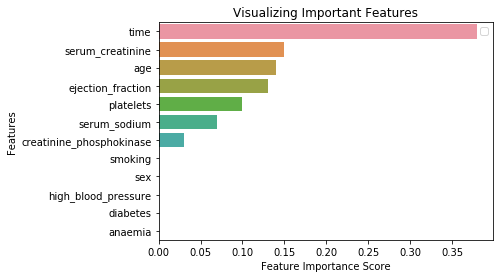

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(classifier.feature_importances_,index=x_train.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Exercise 1: 
Use Adaboost to predict the incidence of diabetes amongst heart patients represented by this dataset.